# Introduction

**Research on real estate prices in St. Petersburg and the Leningrad region.**

Data is provided from the website for the sale of apartments in St. Petersburg and nearby settlements. We need to learn how to determine the price of an object depending on the given data. In future projects, this will help to predict fraudulent activity.

_Purpose of the study:_ Determine which factors most influence the price of apartments.

_Research:_ The data is contained in the file real_estate_data.csv. Before proceeding with analysis, we should check the quality of the data. We need to change the original dataframe if there are incorrectly named columns, missing values, explicit and implicit duplicates, and outliers. Then, using histograms, scatter plots, boxplots and correlation tables, we can evaluate the impact of each factor on the property price or price per square meter. During the study, it may be necessary to calculate new parameters based on the original data.

# **Opening the file**

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


<AxesSubplot:>

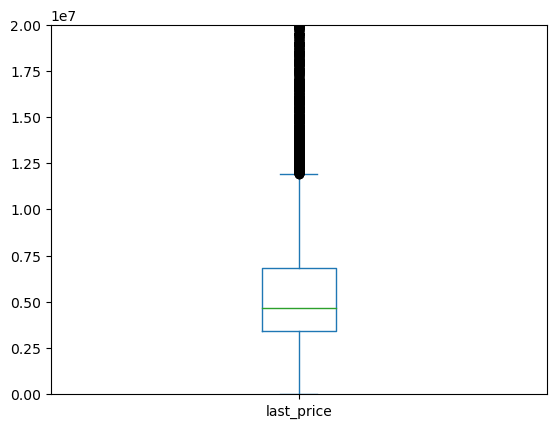

In [6]:
data['last_price'].plot(kind='box', ylim=(0, 20000000))

array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>]],
      dtype=object)

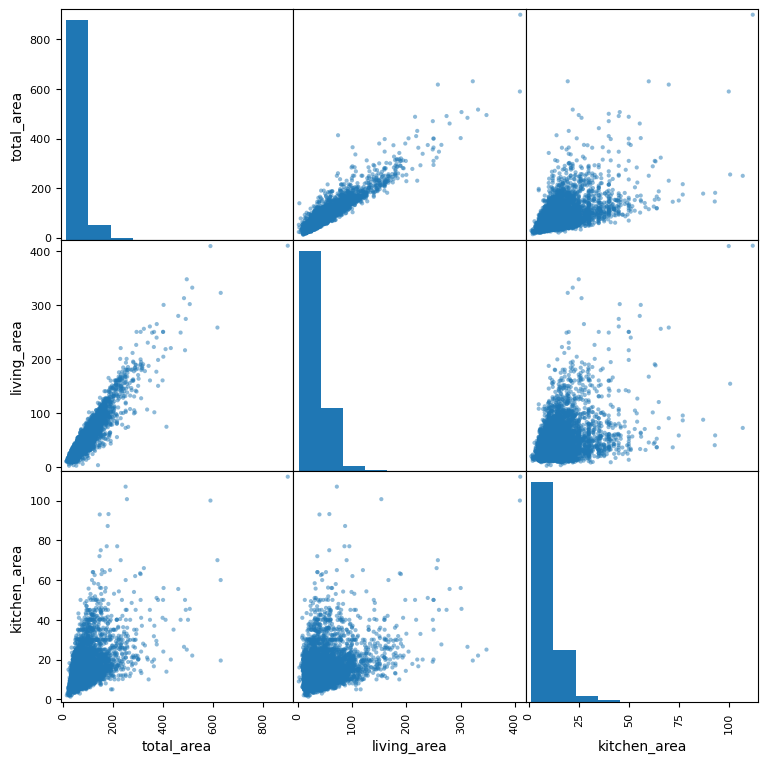

In [7]:
pd.plotting.scatter_matrix(data[['total_area', 'living_area', 'kitchen_area']], figsize=(9, 9))

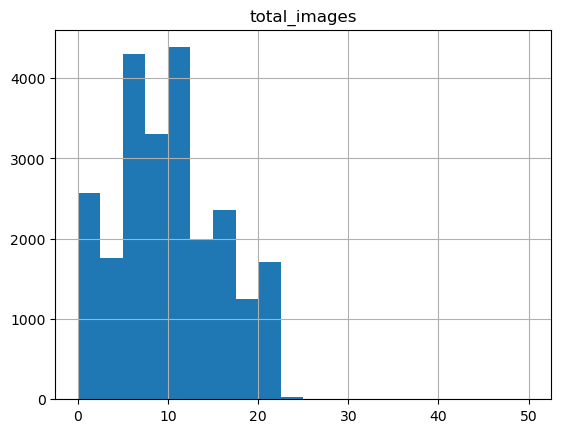

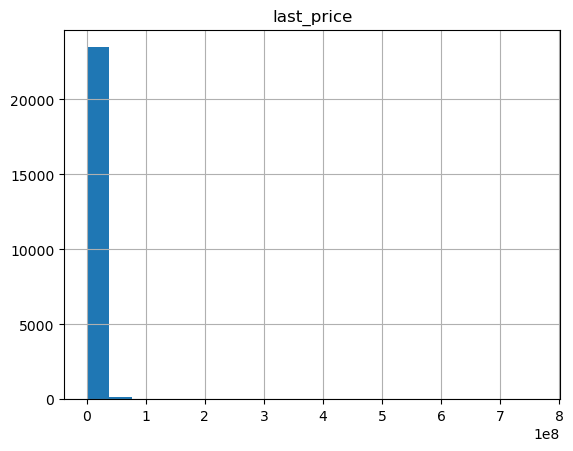

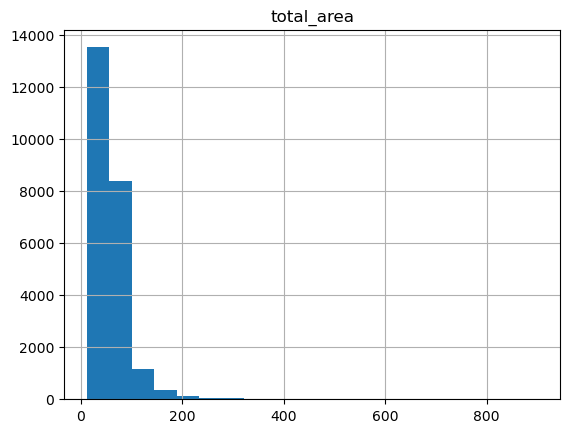

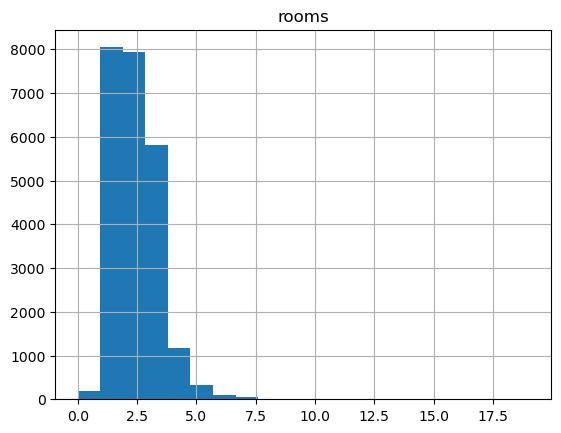

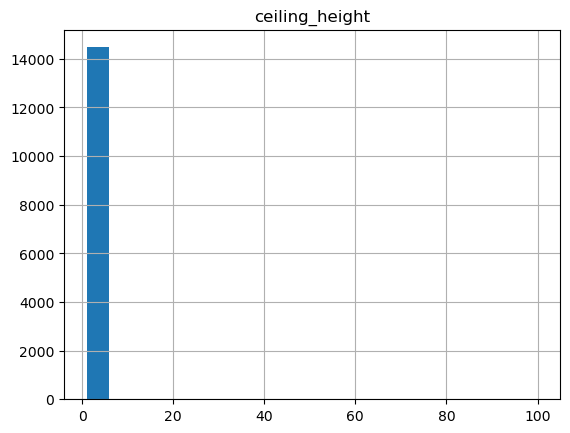

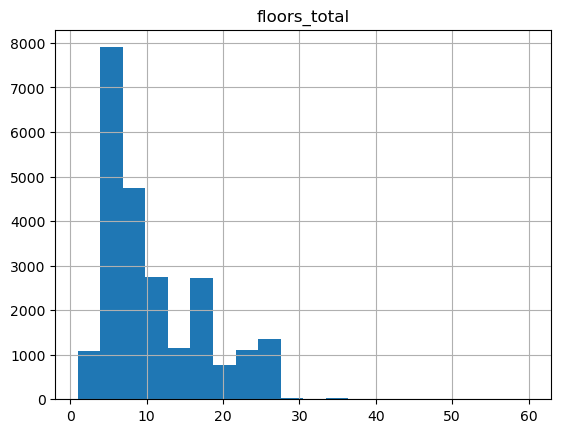

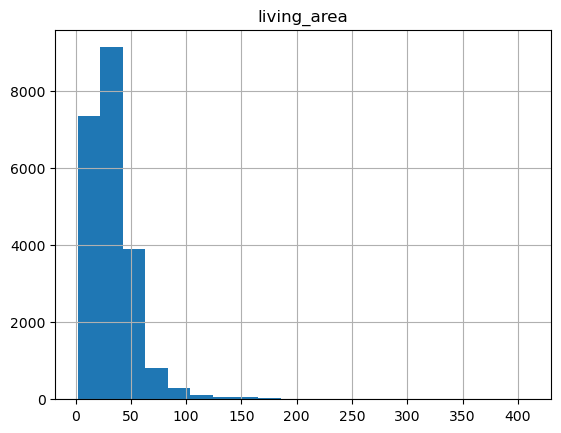

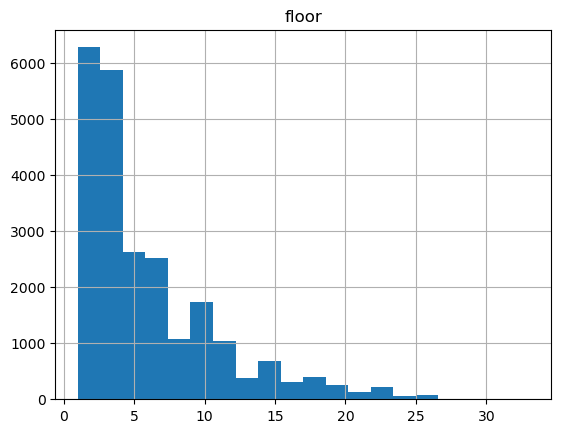

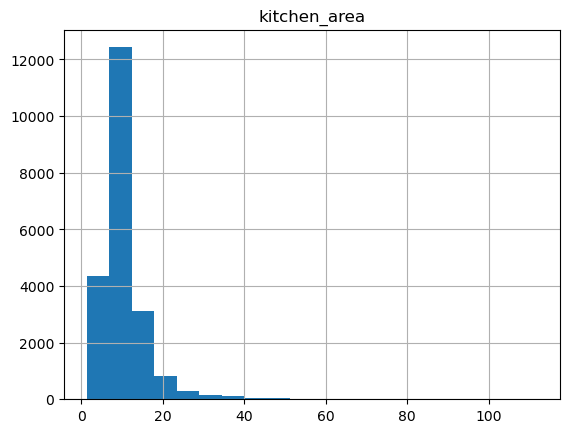

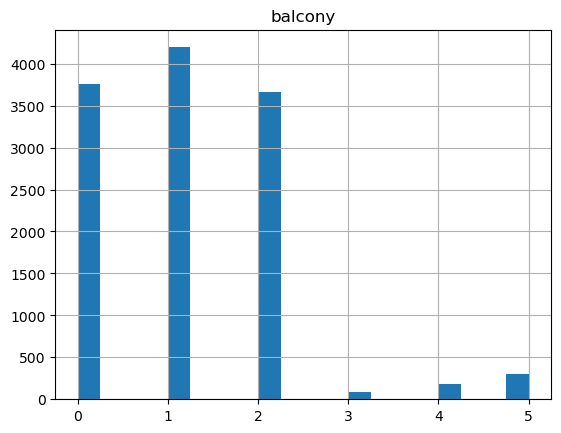

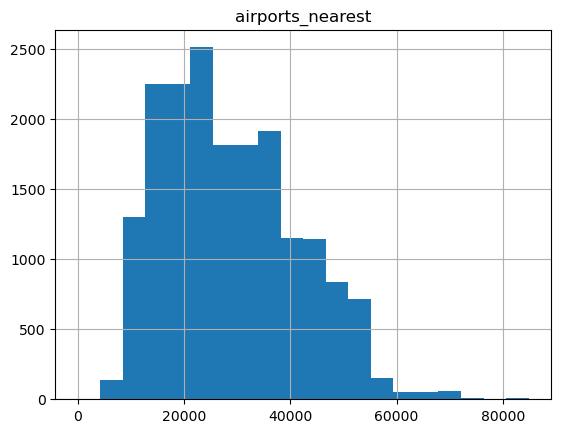

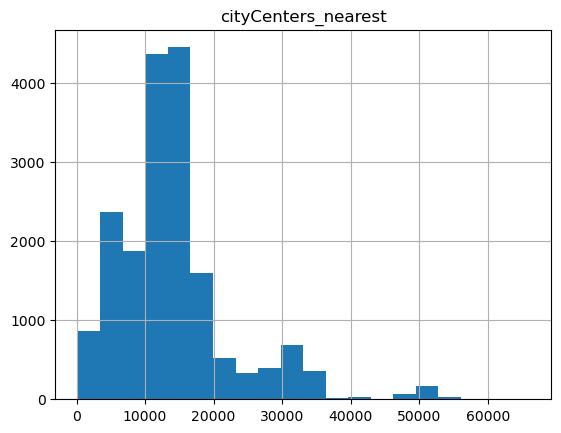

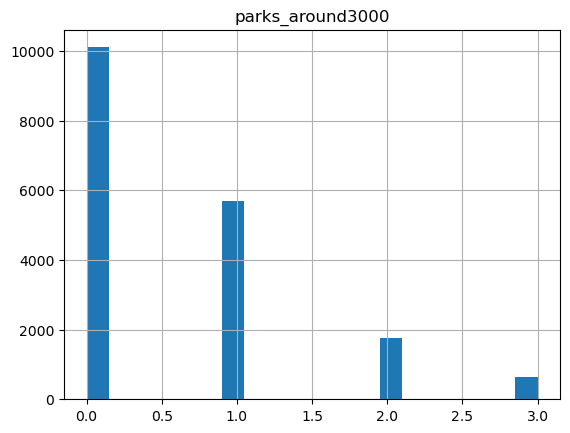

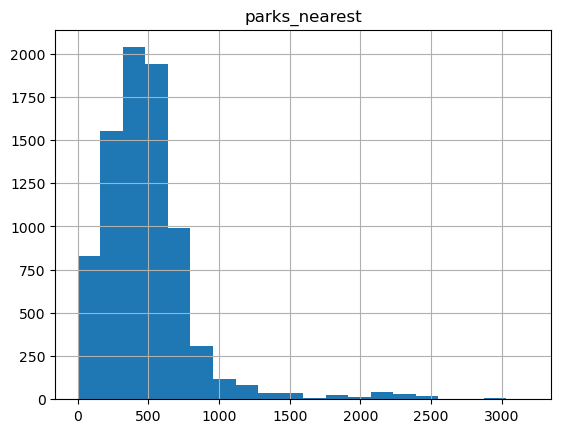

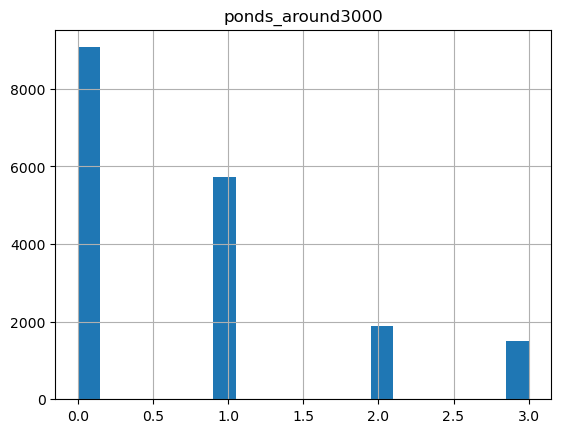

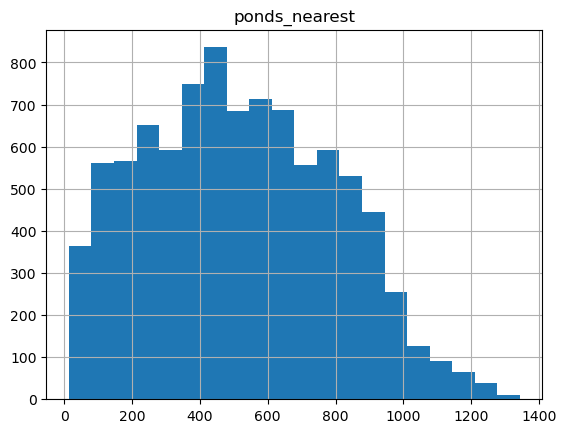

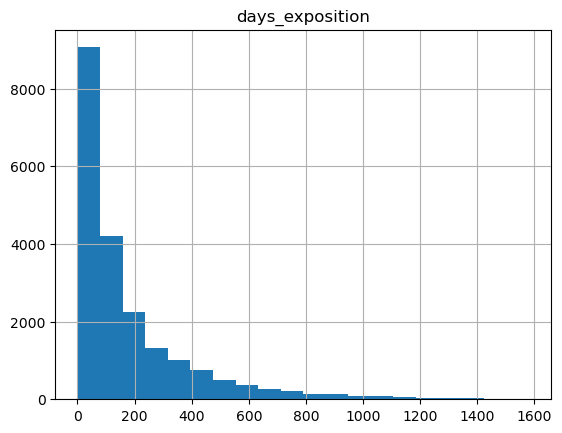

In [8]:
for column in data.columns:
    try:
        data.hist(column, bins=20)
    except:
        pass

# **Preprocessing**

In [9]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [11]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height'] / 10)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
data['ceiling_height'] = data['ceiling_height'][(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 3.5)]
len(data)

23699

Ceilings below 2.4 meters are excluded from the dataframe as they do not meet the requirements for the construction of residential buildings. Perhaps these outliers are due to a typo.

In [13]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.683062
std          0.174630
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

In [15]:
data['is_apartment'].isna().sum()

20924

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [17]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].unique()

array([False,  True])

In [18]:
data['balcony'].fillna(0, inplace=True)
data = data.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [19]:
data.index

RangeIndex(start=0, stop=23565, step=1)

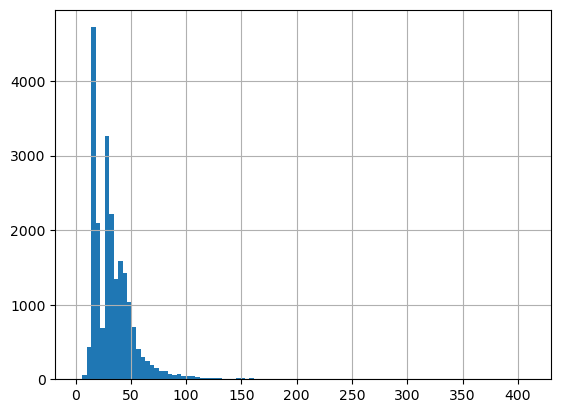

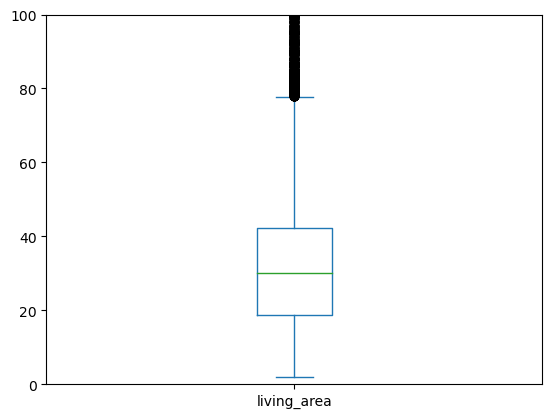

,total_area,living_area,kitchen_area
total_area,1.000000,0.939771,0.609248
living_area,0.939771,1.000000,0.428909
kitchen_area,0.609248,0.428909,1.000000


In [20]:
from matplotlib import pyplot as plt

data['living_area'].hist(bins=100)
plt.show()
data['living_area'].plot(kind='box', ylim=(0, 100))
plt.show()
data[['total_area', 'living_area', 'kitchen_area']].corr()

In [21]:
data = data.loc[data['living_area'] <= 80]
len(data)

21017

In [22]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              629
balcony                     0
locality_name               0
airports_nearest         4887
city_centers_nearest     4869
parks_around3000         4868
parks_nearest           14004
ponds_around3000         4868
ponds_nearest           13127
days_exposition          2806
dtype: int64

In [23]:
len(data.query('kitchen_area < 20'))

19565

In [24]:
data = data.loc[data['kitchen_area'] <= 20]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19673 entries, 1 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19673 non-null  int64  
 1   last_price            19673 non-null  float64
 2   total_area            19673 non-null  float64
 3   first_day_exposition  19673 non-null  object 
 4   rooms                 19673 non-null  int64  
 5   ceiling_height        19673 non-null  float64
 6   floors_total          19673 non-null  float64
 7   living_area           19673 non-null  float64
 8   floor                 19673 non-null  int64  
 9   is_apartment          19673 non-null  bool   
 10  studio                19673 non-null  bool   
 11  open_plan             19673 non-null  bool   
 12  kitchen_area          19673 non-null  float64
 13  balcony               19673 non-null  float64
 14  locality_name         19673 non-null  object 
 15  airports_nearest   

In [25]:
data['living_area'].fillna(data['living_area'].median(), inplace=True)
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)
data[['total_area', 'living_area', 'kitchen_area']].corr()

,total_area,living_area,kitchen_area
total_area,1.000000,0.912382,0.497725
living_area,0.912382,1.000000,0.251439
kitchen_area,0.497725,0.251439,1.000000


In [26]:
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4622
city_centers_nearest     4604
parks_around3000            0
parks_nearest           13212
ponds_around3000            0
ponds_nearest           12409
days_exposition          2572
dtype: int64

In [27]:
data['first_day_exposition'] =  pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [28]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

Renaming settlements to later check for implicit duplicates

In [29]:
def new_name(string):
    string = string.replace('ё', 'е')
    string = string.replace('городской поселок', 'поселок')
    string = string.replace('поселок городского типа', 'поселок')
    string = string.replace('коттеджный поселок', 'поселок')
    string = string.replace('поселок при железнодорожной станции', 'поселок станции')
    string = string.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
    return string

new_name('посёлок городского типа')

'поселок'

In [30]:
data['locality_name'] = data['locality_name'].apply(new_name)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Выскатка', 'деревня Гарболово', 'деревня Глинка

In [31]:
data.duplicated().sum()

0

In [32]:
locations_to_change = []
for locality, group_data in data.groupby('locality_name'):
    if (group_data['city_centers_nearest'].isna().sum() / len(group_data) != 1 and
        group_data['city_centers_nearest'].isna().sum() / len(group_data) != 0):
        locations_to_change.append(locality)

for locality in locations_to_change:
    data.loc[data['locality_name'] == locality, 'city_centers_nearest'] = (
        data.loc[data['locality_name'] == locality, 'city_centers_nearest']
        .fillna(data.loc[data['locality_name'] == locality, 'city_centers_nearest'].median())
    )
data['city_centers_nearest'].isna().sum()

4566

In [33]:
locations_to_change = []
for locality, group_data in data.groupby('locality_name'):
    if (group_data['airports_nearest'].isna().sum() / len(group_data) != 1 and
        group_data['airports_nearest'].isna().sum() / len(group_data) != 0):
        locations_to_change.append(locality)

for locality in locations_to_change:
    data.loc[data['locality_name'] == locality, 'airports_nearest'] = (
        data.loc[data['locality_name'] == locality, 'airports_nearest']
        .fillna(data.loc[data['locality_name'] == locality, 'airports_nearest'].median())
    )
data['airports_nearest'].isna().sum()

4566

In [34]:
data.loc[data['parks_nearest'].isna(), 'parks_around3000'].sum()

0.0

In [35]:
data.loc[data['ponds_nearest'].isna(), 'ponds_around3000'].sum()

0.0

In [36]:
data.duplicated().sum()

0

In [37]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [38]:
for column in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    try:
        data[column] = data[column].astype('int64')
    except:
        pass

data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19673 entries, 1 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19673 non-null  int64         
 1   last_price            19673 non-null  float64       
 2   total_area            19673 non-null  float64       
 3   first_day_exposition  19673 non-null  datetime64[ns]
 4   rooms                 19673 non-null  int64         
 5   ceiling_height        19673 non-null  float64       
 6   floors_total          19673 non-null  int64         
 7   living_area           19673 non-null  float64       
 8   floor                 19673 non-null  int64         
 9   is_apartment          19673 non-null  bool          
 10  studio                19673 non-null  bool          
 11  open_plan             19673 non-null  bool          
 12  kitchen_area          19673 non-null  float64       
 13  balcony         

In [40]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [41]:
(data['first_day_exposition'].max() - data['first_day_exposition']).dt.days

1         150
2        1352
5         235
6         547
8         345
         ... 
23558     665
23559    1001
23560     773
23561     473
23564     651
Name: first_day_exposition, Length: 19673, dtype: int64

In [42]:
data['days_exposition'].fillna((data['first_day_exposition'].max() - data['first_day_exposition']).dt.days, inplace=True)

print(data.isna().sum())
data.info()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4566
city_centers_nearest     4566
parks_around3000            0
parks_nearest           13212
ponds_around3000            0
ponds_nearest           12409
days_exposition             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19673 entries, 1 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19673 non-null  int64         
 1   last_price            19673 non-null  f

In [43]:
data['days_exposition'] = data['days_exposition'].astype('int64')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

In [44]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,19673.000000,1.967300e+04,19673.000000,19673.000000,19673.000000,19673.000000,19673.000000,19673.000000,19673.000000,19673.000000,15107.000000,15107.000000,19673.000000,6461.000000,19673.000000,7264.000000,19673.000000
mean,9.957607,5.326821e+06,54.781642,1.970772,2.670849,10.691659,31.455780,5.866365,9.397428,0.628069,28833.774641,14719.900212,0.441722,491.426250,0.555330,527.751652,182.523052
std,5.576589,3.655918e+06,20.570303,0.910441,0.162000,6.551931,13.907975,4.834216,3.253708,0.964856,12870.917102,8585.104295,0.720546,336.709856,0.853491,276.267938,226.559288
min,0.000000,4.300000e+05,14.000000,0.000000,2.400000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,39.600000,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,0.000000,18134.000000,10299.500000,0.000000,290.000000,0.000000,309.000000,41.000000
50%,10.000000,4.500000e+06,50.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,27006.000000,13370.000000,0.000000,457.000000,0.000000,514.000000,96.000000
75%,14.000000,6.210000e+06,65.200000,3.000000,2.700000,16.000000,40.700000,8.000000,11.000000,1.000000,37434.000000,16496.000000,1.000000,614.000000,1.000000,736.000000,232.000000
max,39.000000,1.240000e+08,413.500000,7.000000,3.500000,60.000000,80.000000,33.000000,20.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1618.000000


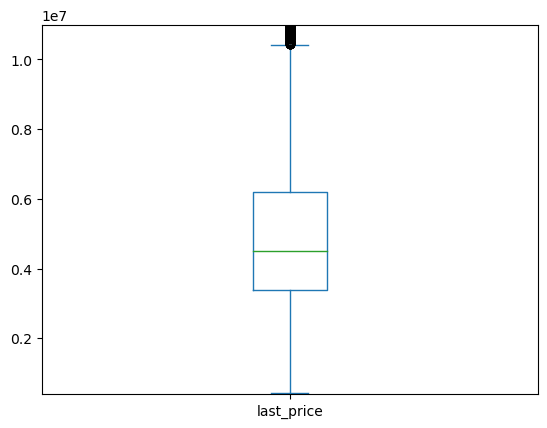

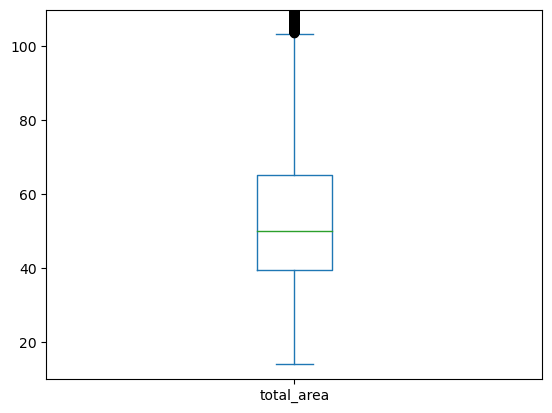

In [45]:
data['last_price'].plot(kind='box', ylim=(400000, 11000000))
plt.show()
data['total_area'].plot(kind='box', ylim=(10, 110))
plt.show()

In [46]:
data = data[(data['total_area'] < 110) & (data['last_price'] < 11000000)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18533 entries, 1 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18533 non-null  int64         
 1   last_price            18533 non-null  float64       
 2   total_area            18533 non-null  float64       
 3   first_day_exposition  18533 non-null  datetime64[ns]
 4   rooms                 18533 non-null  int64         
 5   ceiling_height        18533 non-null  float64       
 6   floors_total          18533 non-null  int64         
 7   living_area           18533 non-null  float64       
 8   floor                 18533 non-null  int64         
 9   is_apartment          18533 non-null  bool          
 10  studio                18533 non-null  bool          
 11  open_plan             18533 non-null  bool          
 12  kitchen_area          18533 non-null  float64       
 13  balcony         

In [47]:
data.index

Int64Index([    1,     2,     5,     6,     8,     9,    10,    11,    12,
               13,
            ...
            23552, 23553, 23554, 23555, 23556, 23557, 23558, 23559, 23561,
            23564],
           dtype='int64', length=18533)

In [48]:
data = data.reset_index(drop=True)
data.index

RangeIndex(start=0, stop=18533, step=1)

Column name 'cityCenters_nearest' is converted to snake 'city_centers_nearest'.

Initially, missing values in the 'city_centers_nearest' and 'airports_nearest' columns were filled with medians depending on the type of location (city, town or village). But then it turned out that such changes lead to outliers in the graph of the price per square meter depending on the distance to the nearest airport and city center. It is likely that the standard deviation of the price per square meter is too large depending on the type of location. Therefore, gaps in these data were changed depending on the location itself. However, there are many locations for which data on the nearest city center or airport is not available. Such gaps remain.

'ceiling_height' values of at least 20 were divided by 10. Values less than 2.4 and greater than 3.5 have been removed. Remaining missing values are changed to median values.

Rows with missing values in the 'floors_total' column have been removed from the dataframe.

The dataframe contains rows with a value in the 'living_area' column below 80. The rest are deleted.

Missing 'is_apartment' values are replaced with False (bool).

The values of the 'kitchen_area' column for studios have been changed to 0. Missing values are filled with the median value.

Missing 'balcony' values changed to 0.

Rows with missing values in the 'locality_name' column have been removed from the dataframe. In the names of settlements, the letter “ё” was changed to “e”, different types of settlements were renamed into villages.

The data was checked for explicit duplicates.

The missing values in the 'parks_around3000' and 'ponds_around3000' columns have been changed to 0.

To make it easier to work with data, the values of the 'first_day_exposition' column have been converted to datetime type.

It is assumed that gaps in 'days_exposition' are due to the fact that this property was sold on the last day that is in the dataframe. They were changed to the difference between the last day and the day of the first announcement.

Columns with continuous values that should be discrete now contain an int data type.

Only those data are left for which 'total_area' is less than 110 and 'last_price' is less than 11,000,000.

It is assumed that the missing values in the 'parks_nearest' and 'ponds_nearest' columns are due to the fact that there are no parks or ponds nearby.

# **Adding columns**

In [49]:
data['sqm_cost'] = data['last_price'] / data['total_area']

In [50]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [51]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [52]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [53]:
def storey(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(storey, axis=1)

In [54]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sqm_cost', 'weekday', 'month',
       'year', 'floor_type'],
      dtype='object')

In [55]:
data['km_city_center'] = data['city_centers_nearest'] // 1000
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4548
city_centers_nearest     4548
parks_around3000            0
parks_nearest           12781
ponds_around3000            0
ponds_nearest           11986
days_exposition             0
sqm_cost                    0
weekday                     0
month                       0
year                        0
floor_type                  0
km_city_center           4548
dtype: int64

In [56]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                  int64
sqm_cost                       float64
weekday                          int64
month                            int64
year                     

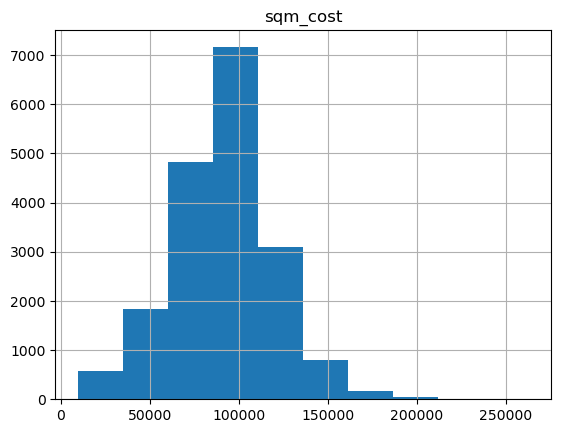

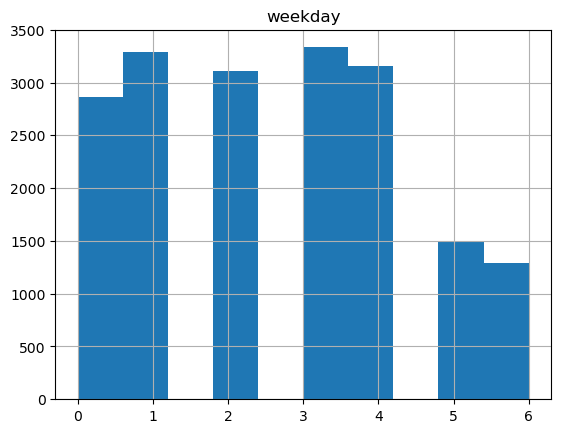

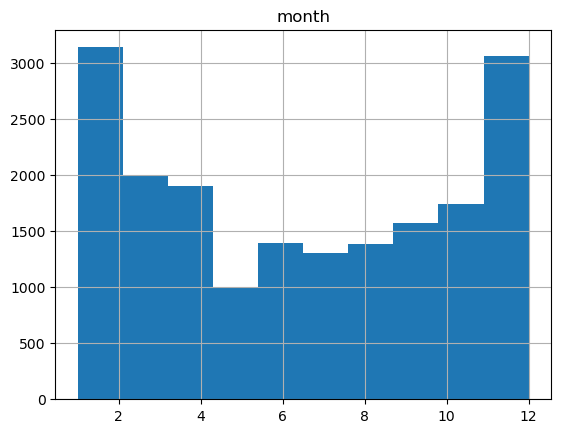

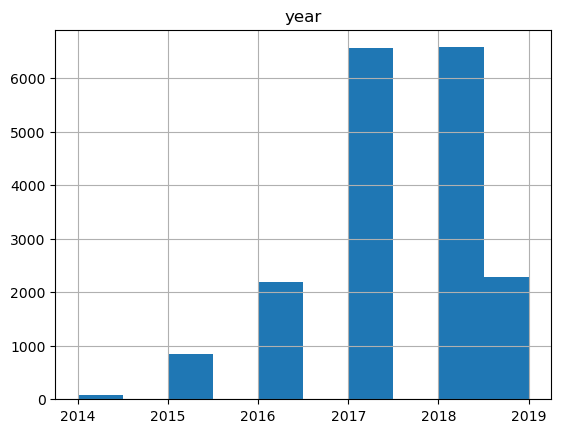

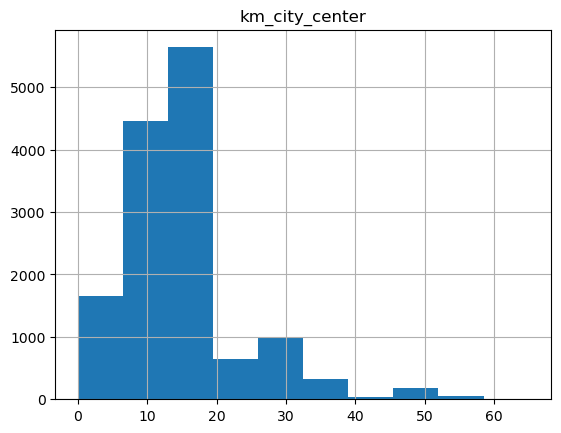

In [57]:
for column in ['sqm_cost', 'weekday', 'month', 'year', 'km_city_center']:
    data.hist(column, bins=10)

# **Exploratory data analysis**

In [58]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_cost,weekday,month,year,km_city_center
count,18533.000000,1.853300e+04,18533.000000,18533.00000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,...,18533.000000,5752.000000,18533.000000,6547.000000,18533.000000,18533.000000,18533.000000,18533.000000,18533.000000,13985.000000
mean,9.861113,4.715556e+06,52.036071,1.90811,2.661065,10.677440,29.917878,5.835483,9.116066,0.622781,...,0.412939,484.990264,0.517186,534.696808,176.467544,91600.030580,2.555064,6.418713,2017.380295,14.689524
std,5.504038,2.020945e+06,16.805574,0.87660,0.152426,6.546195,12.343082,4.820686,3.036590,0.948088,...,0.698229,318.737519,0.817920,276.438408,218.736369,28584.742067,1.785301,3.461225,1.020026,8.557025
min,0.000000,4.300000e+05,14.000000,0.00000,2.400000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,16.000000,0.000000,9615.384615,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.328000e+06,39.000000,1.00000,2.570000,5.000000,18.000000,2.000000,7.000000,0.000000,...,0.000000,290.000000,0.000000,318.000000,40.000000,74906.367041,1.000000,3.000000,2017.000000,10.000000
50%,9.000000,4.350000e+06,48.300000,2.00000,2.650000,9.000000,29.000000,4.000000,8.700000,0.000000,...,0.000000,456.000000,0.000000,523.000000,93.000000,92364.532020,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,5.800000e+06,62.000000,3.00000,2.650000,15.000000,39.000000,8.000000,10.900000,1.000000,...,1.000000,612.000000,1.000000,745.000000,225.000000,108450.704225,4.000000,10.000000,2018.000000,16.000000
max,39.000000,1.099900e+07,109.700000,6.00000,3.500000,60.000000,80.000000,33.000000,20.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1618.000000,262711.864407,6.000000,12.000000,2019.000000,65.000000


,total_area,living_area,kitchen_area
total_area,1.00000,0.914840,0.409100
living_area,0.91484,1.000000,0.122641
kitchen_area,0.40910,0.122641,1.000000


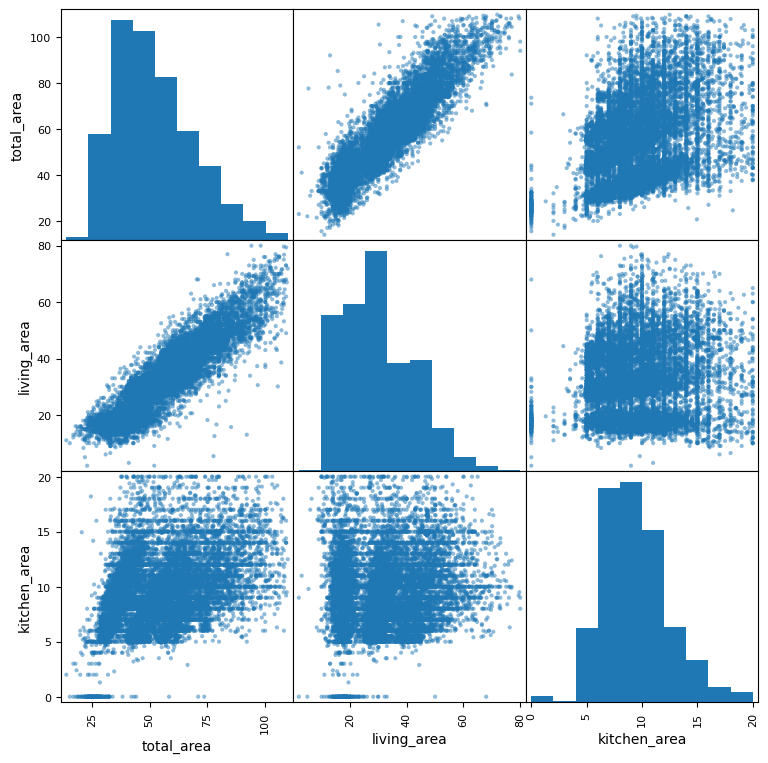

In [59]:
pd.plotting.scatter_matrix(data[['total_area', 'living_area', 'kitchen_area']], figsize=(9, 9))
data[['total_area', 'living_area', 'kitchen_area']].corr()

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

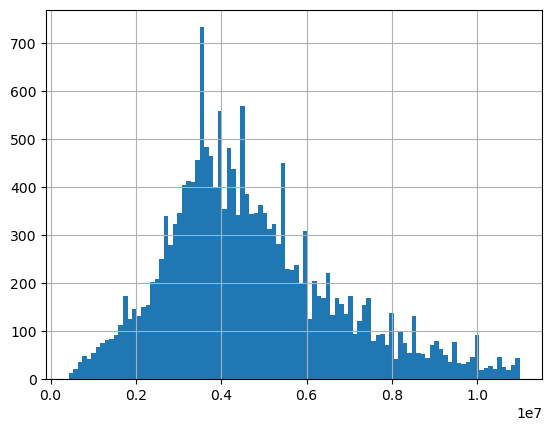

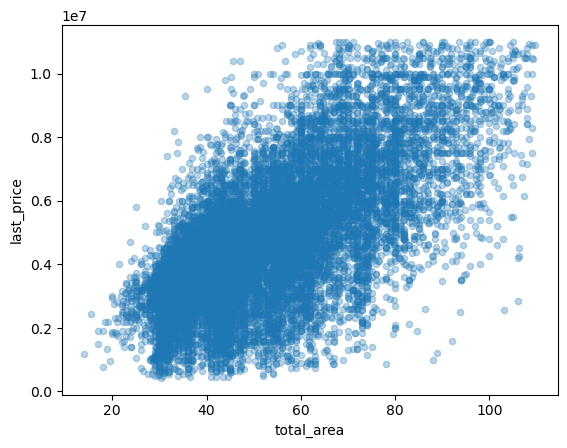

In [60]:
data['last_price'].hist(bins=100)
data.plot(kind='scatter', x='total_area', y='last_price', alpha=0.3)

Prices vary greatly over time. However, a trend of rising prices is visible.

<AxesSubplot:xlabel='first_day_exposition'>

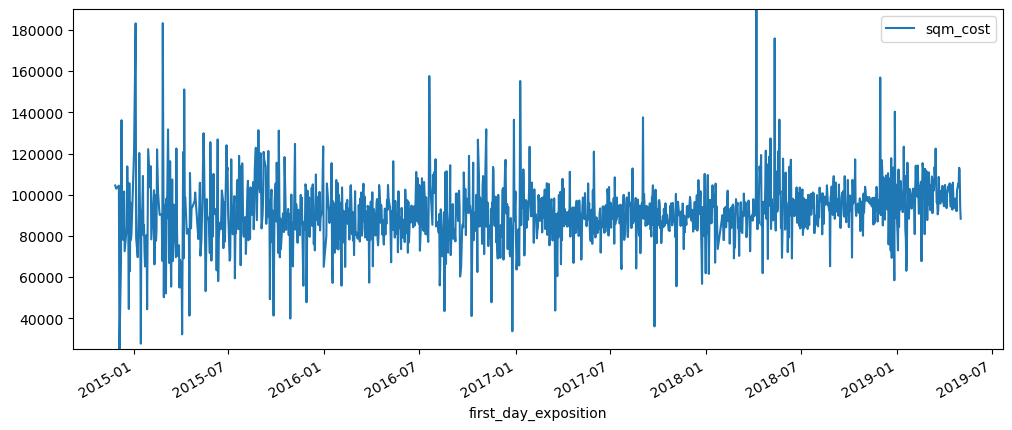

In [61]:
data.pivot_table(index='first_day_exposition', values='sqm_cost', aggfunc='median').plot(ylim=(25000, 190000), figsize=(12, 5))

<AxesSubplot:xlabel='first_day_exposition'>

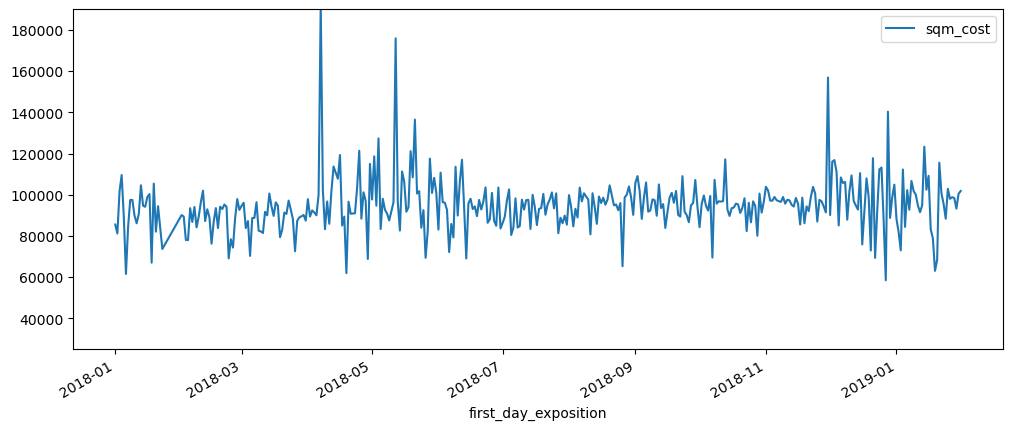

In [62]:
(data
 .pivot_table(index='first_day_exposition', values='sqm_cost', aggfunc='median')
 .loc['2018':'2019-01']
 .plot(ylim=(25000, 190000), figsize=(12, 5))
)

<AxesSubplot:xlabel='year_month'>

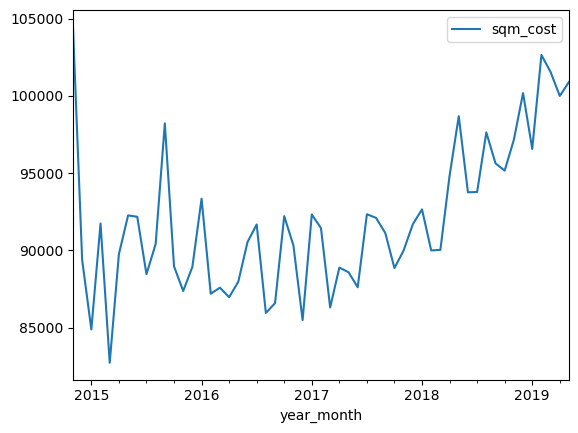

In [63]:
data['year_month'] = data['first_day_exposition'].dt.to_period('M')
data.pivot_table(index='year_month', values='sqm_cost', aggfunc='median').plot()

<AxesSubplot:xlabel='year_month', ylabel='sqm_cost'>

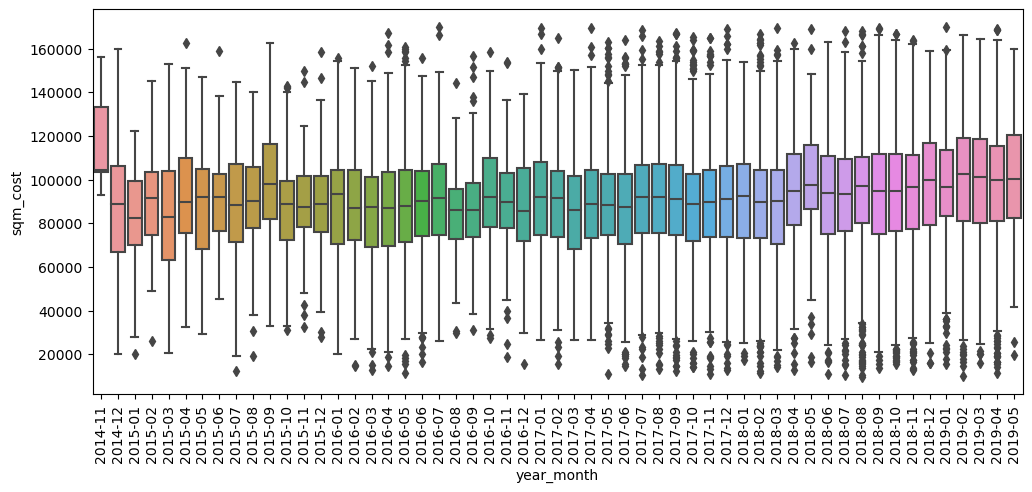

In [64]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.xticks(rotation='vertical')
sns.boxplot(data=data.query('sqm_cost < 170000').sort_values(by='year_month'), x='year_month', y='sqm_cost')

In [65]:
data['sqm_cost'].corr(data['rooms'])

-0.24536596967925503

<AxesSubplot:>

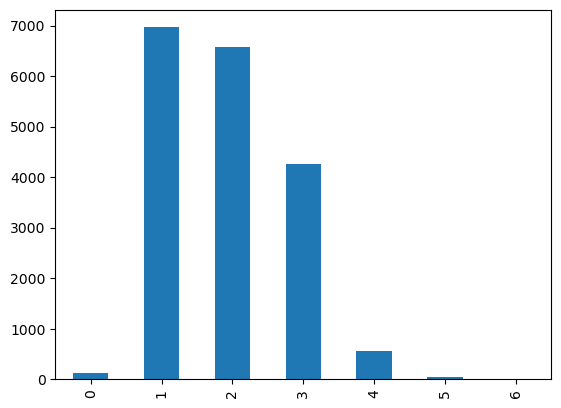

In [66]:
data['rooms'].value_counts().sort_index().plot(kind='bar', legend=None)

Prices per square meter decrease with the number of rooms.

<AxesSubplot:xlabel='rooms', ylabel='sqm_cost'>

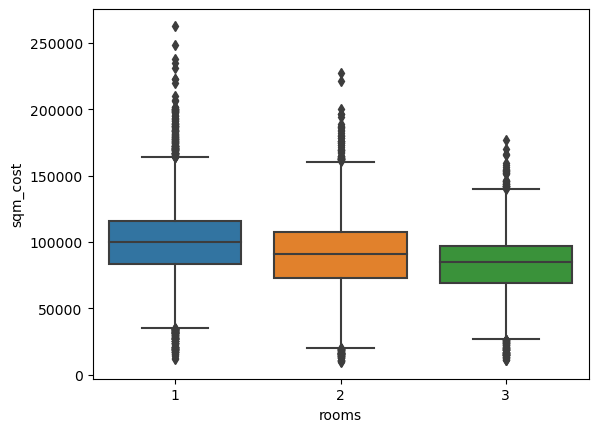

In [67]:
sns.boxplot(data=data.query('0 < rooms < 4'), x='rooms', y='sqm_cost')

<AxesSubplot:xlabel='ceiling_height', ylabel='sqm_cost'>

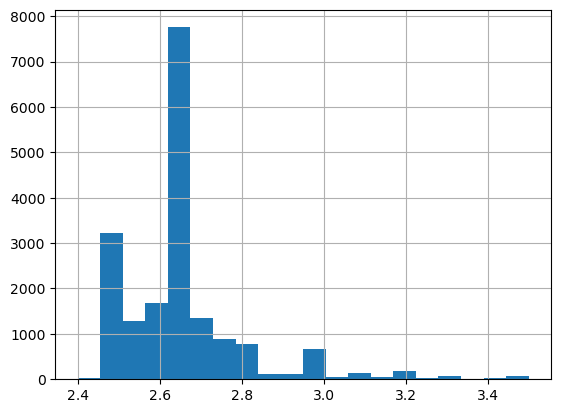

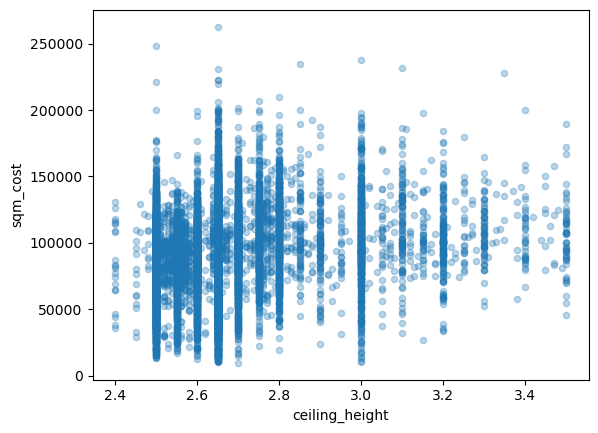

In [68]:
data['ceiling_height'].hist(bins=20)
data.plot(kind='scatter', x='ceiling_height', y='sqm_cost', alpha=0.3)

floor 0.259857636025874
floors_total 0.3571145224326556


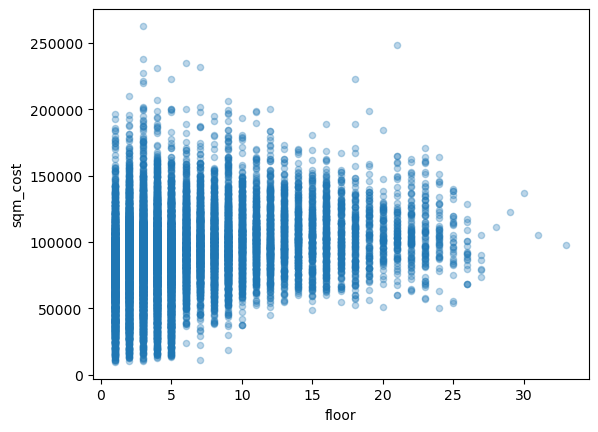

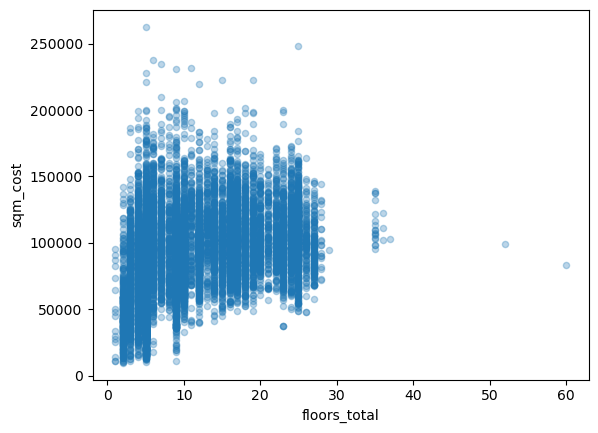

In [69]:
for column in ['floor', 'floors_total']:
    data.plot(kind='scatter', x=column, y='sqm_cost', alpha=0.3)
    print(column, data['sqm_cost'].corr(data[column]))

The median price per square meter of the first or last floor of the house is slightly lower than the median price of other floors.

<AxesSubplot:xlabel='floor_type', ylabel='sqm_cost'>

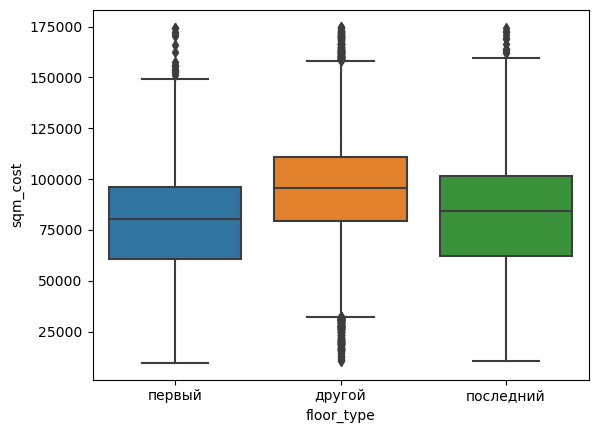

In [70]:
sns.boxplot(data=data.query('sqm_cost < 175000'), x='floor_type', y='sqm_cost')

There is no strong linear relationship between the price of sq. meters and distance to the park or airport.

But apartments further from the city center cost a little less.

city_centers_nearest -0.4001436649837382
airports_nearest -0.04101968566898045
parks_nearest 0.051732048917361516


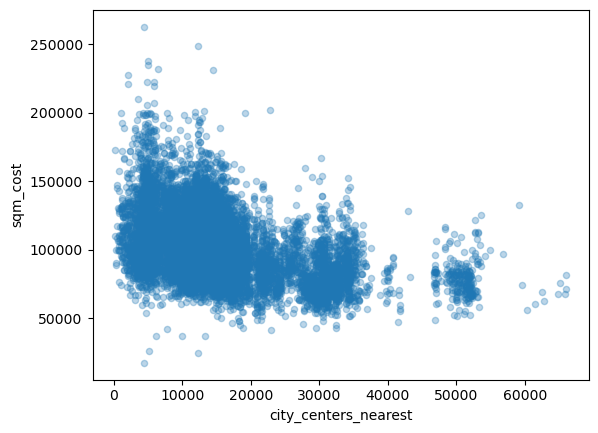

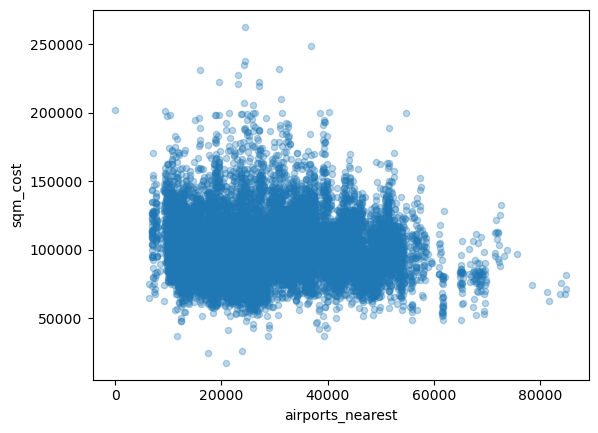

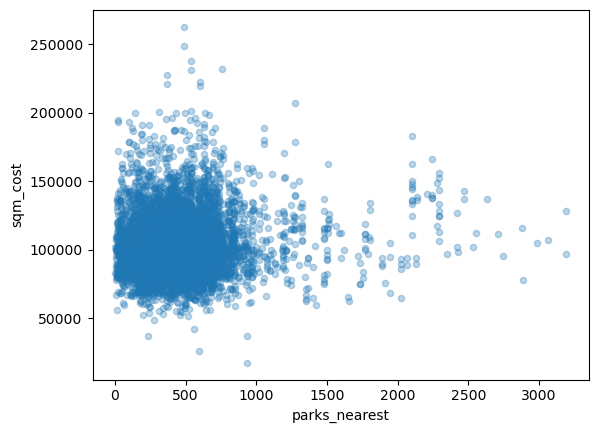

In [71]:
for _ in ['city_centers_nearest', 'airports_nearest', 'parks_nearest']:
    data.plot(kind='scatter', alpha=0.3, x=_, y='sqm_cost')
    print(_, data[_].corr(data['sqm_cost']))

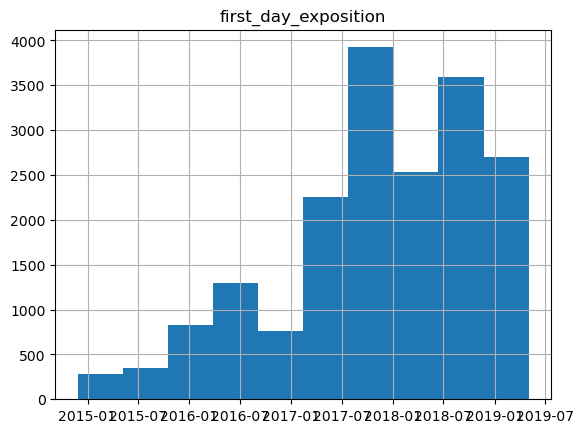

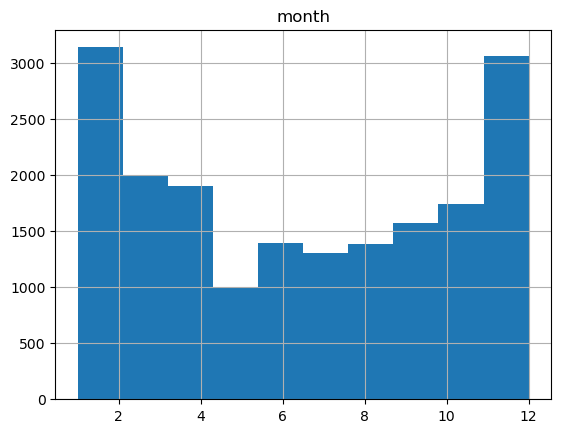

In [72]:
for _ in ['first_day_exposition', 'month']:
    data.hist(_)

<AxesSubplot:xlabel='year', ylabel='month'>

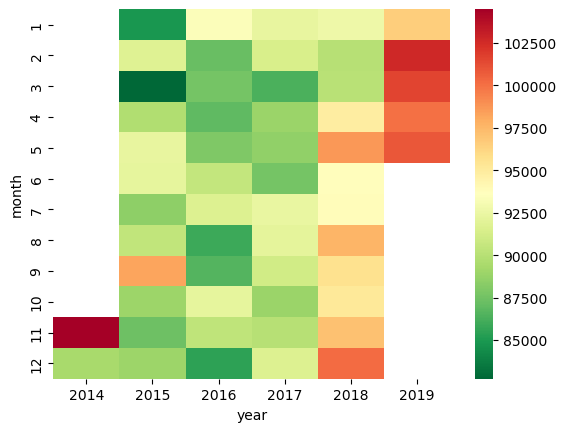

In [73]:
sns.heatmap(data.pivot_table(index='month', columns='year', values='sqm_cost', aggfunc='median'), cmap='RdYlGn_r')

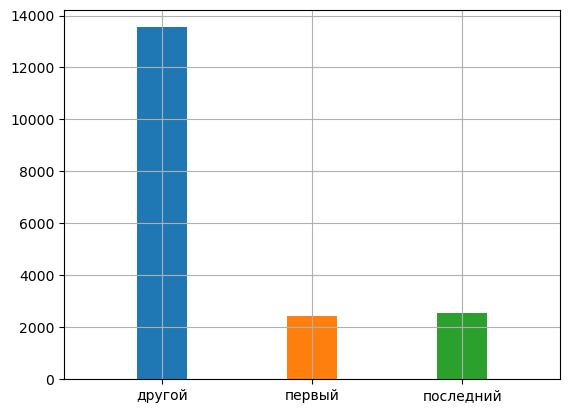

In [74]:
for floor, group in data.groupby('floor_type'):
    group['floor_type'].hist(bins=3)

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

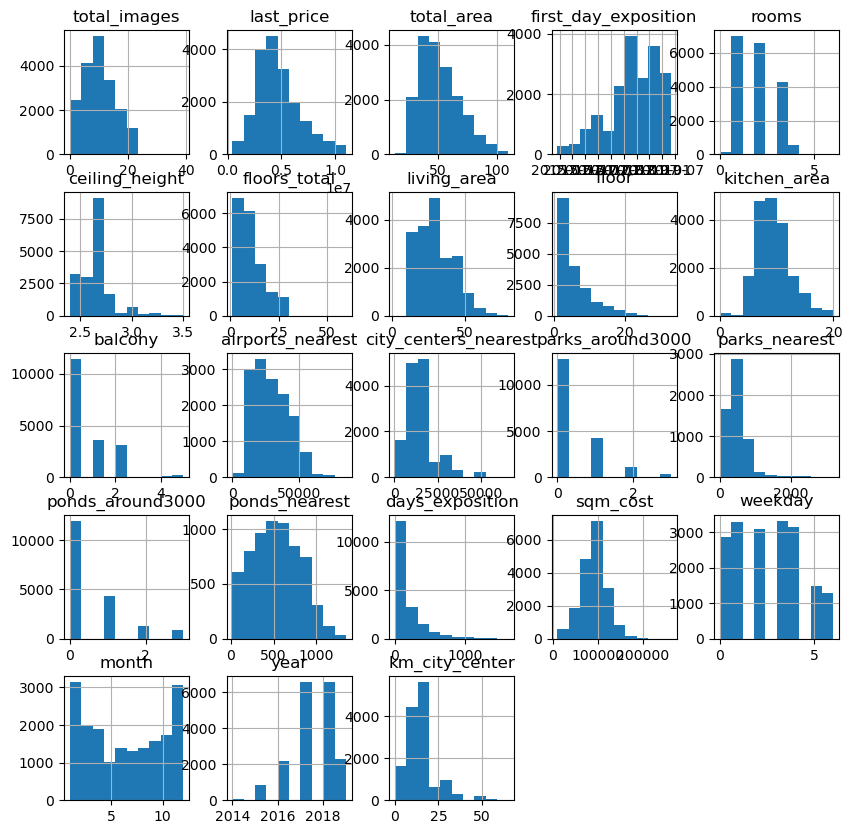

In [75]:
data.hist(figsize=(10, 10));

Approximately half of all properties are sold within three months. Some are sold immediately after the announcement. Sometimes - after 500 days from the date of the advertisement.

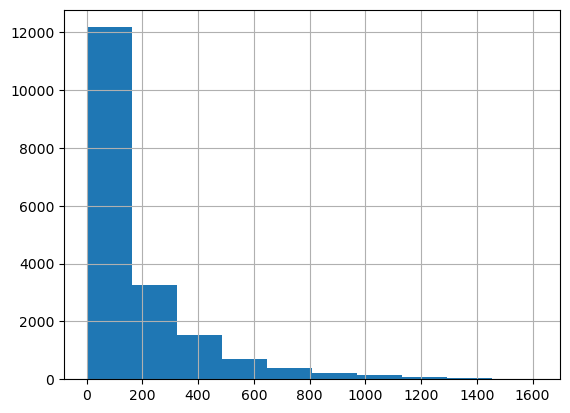

count    18533.000000
mean       176.467544
std        218.736369
min          0.000000
25%         40.000000
50%         93.000000
75%        225.000000
max       1618.000000
Name: days_exposition, dtype: float64

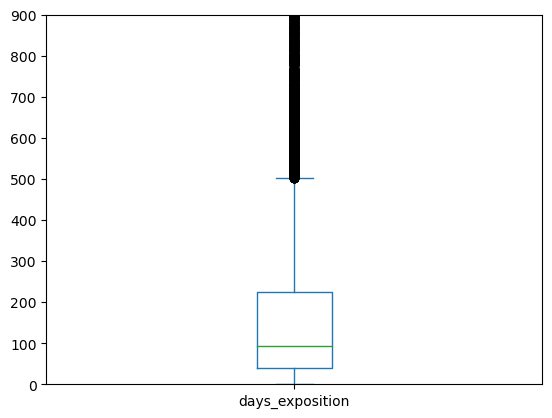

In [76]:
data['days_exposition'].hist()
plt.show()
data['days_exposition'].plot(kind='box', ylim=(0, 900))
data['days_exposition'].describe()

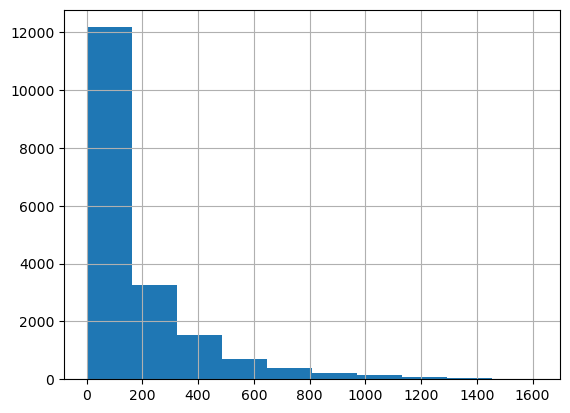

count    18533.000000
mean       176.467544
std        218.736369
min          0.000000
25%         40.000000
50%         93.000000
75%        225.000000
max       1618.000000
Name: days_exposition, dtype: float64

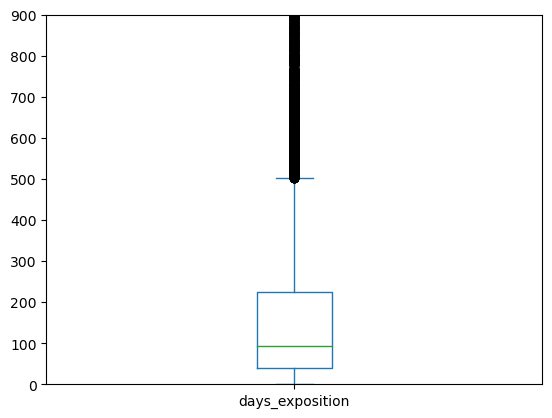

In [77]:
data['days_exposition'].hist()
plt.show()
data['days_exposition'].plot(kind='box', ylim=(0, 900))
data['days_exposition'].describe()

The total price of the property depends moderately on the total area.

Living area has little effect on the full price, since there are many apartments with a living area of ​​~18 sq.m., but in the price range from 2 to 5 million.

The size of the kitchen does not greatly affect the overall cost.

total_area 0.6782450325750218
living_area 0.5530856726374824
kitchen_area 0.4653011664958446
weekday -0.010345540808091611
month 0.0027779353987346786
year 0.019970470081734974


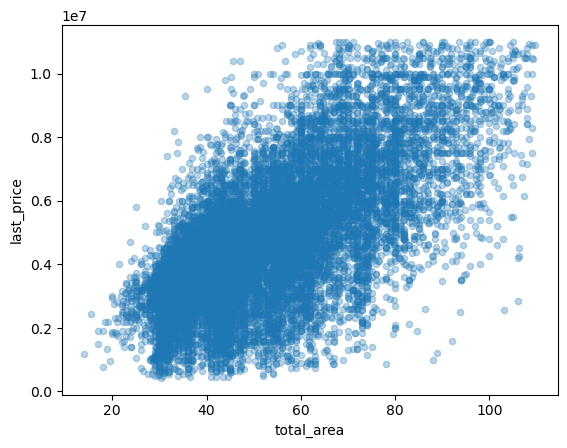

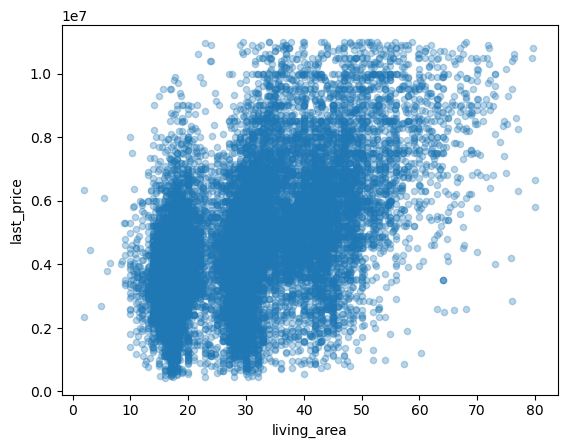

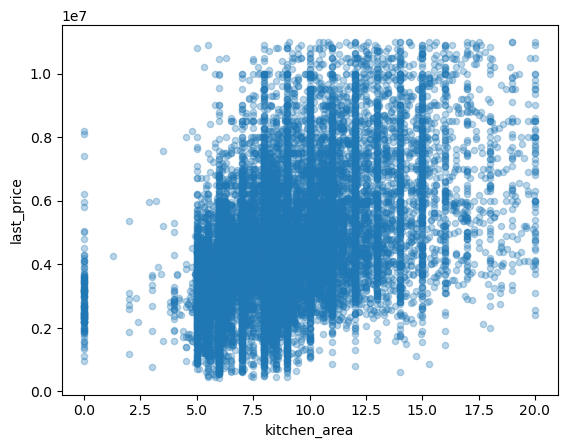

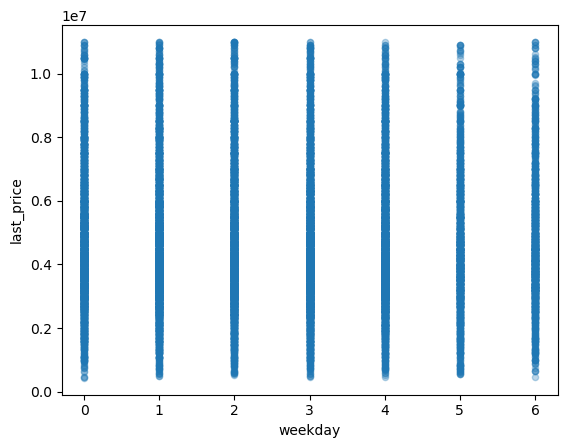

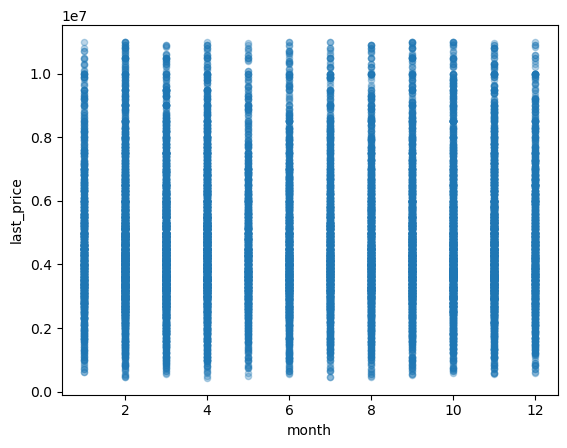

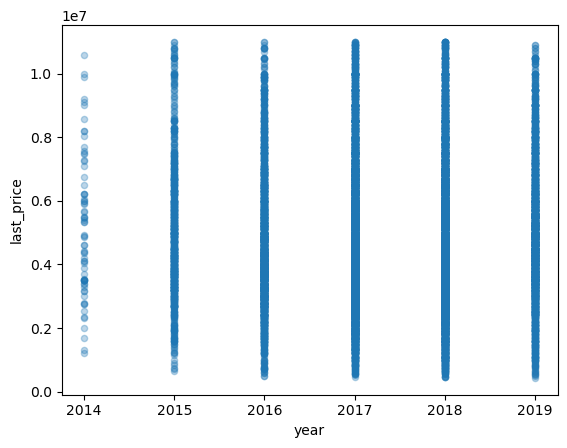

In [78]:
for _ in ['total_area', 'living_area', 'kitchen_area', 'weekday', 'month', 'year']:
    data.plot(kind='scatter', x=_, y='last_price', alpha=0.3)
    print(_, data[_].corr(data['last_price']))

The total price of the property increases with the number of rooms in the apartment, from 2,500,000 for a no-room apartment to 7,500,000 for a 5-room apartment.

More than half of the apartments on the first or last floor are cheaper than 4,000,000, while more than half of the apartments on other floors are more expensive than 4,000,000.

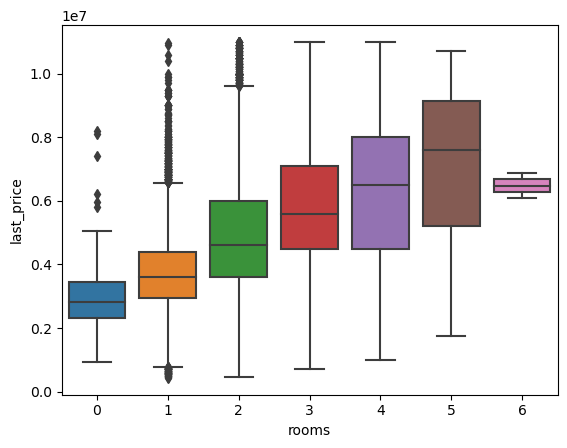

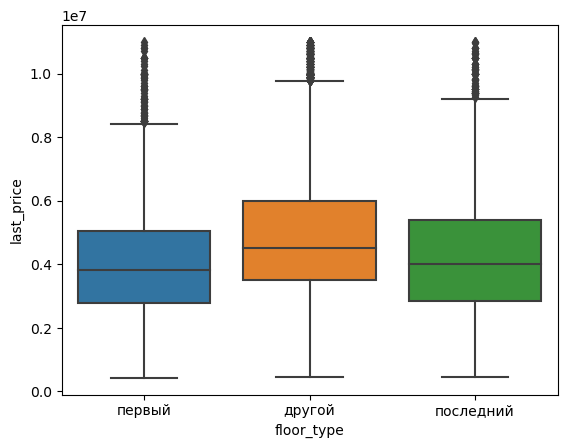

In [79]:
for _ in ['rooms', 'floor_type']:
    sns.boxplot(data=data, x=_, y='last_price')
    plt.show()

General property prices vary greatly depending on the season and year. They were lower in the summer of 2016 and 2017 and higher in November 2014 and February, March, September 2015.

<AxesSubplot:xlabel='first_day_exposition'>

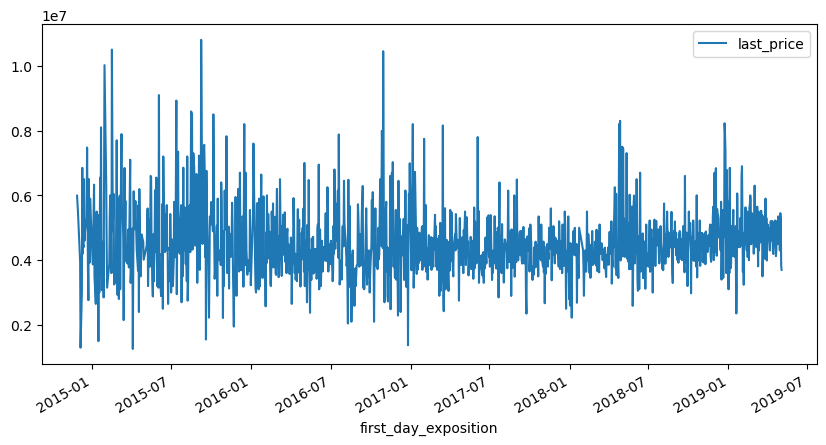

In [80]:
data.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median').plot(figsize=(10, 5))

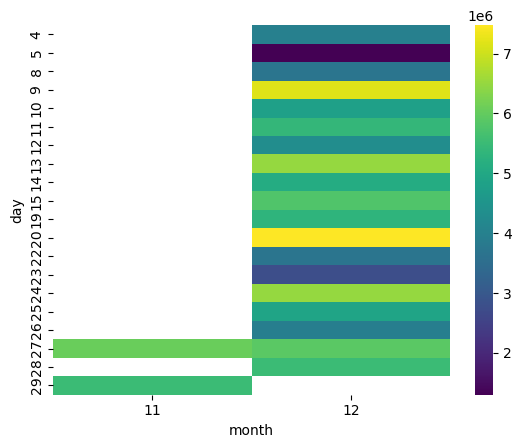

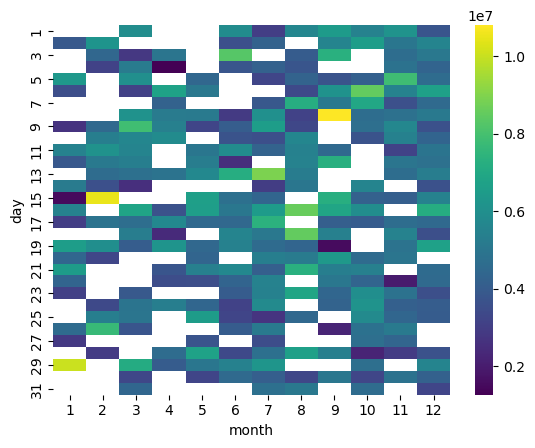

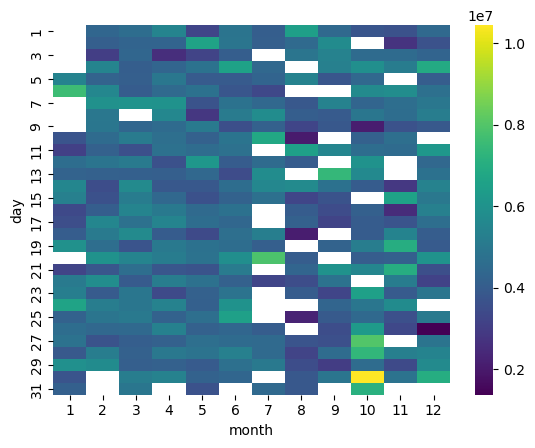

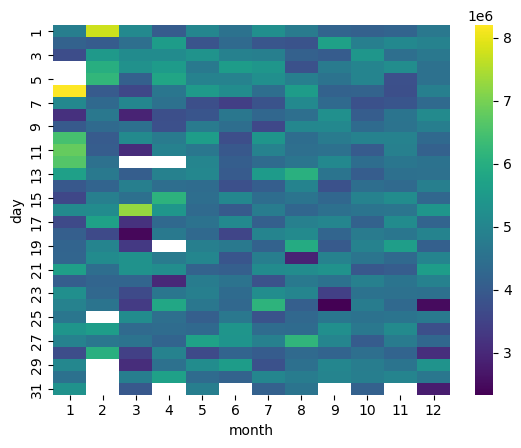

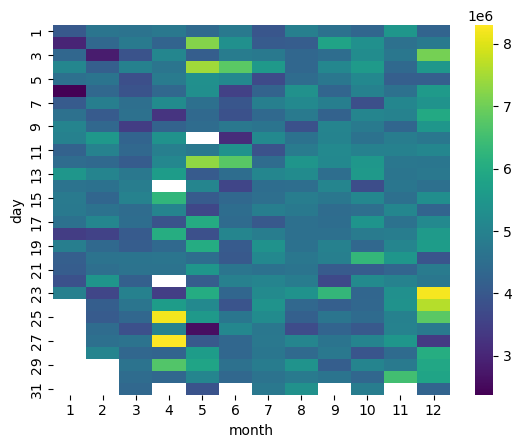

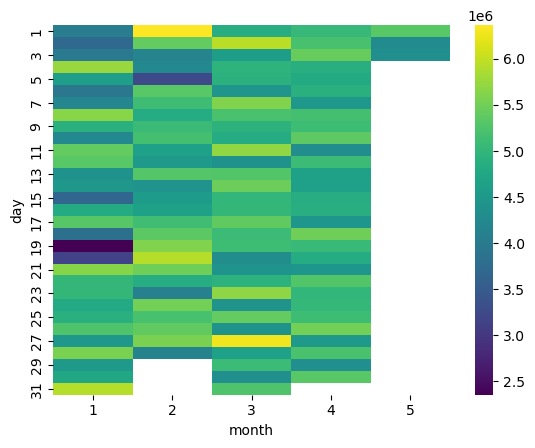

In [81]:
data['day'] = data['first_day_exposition'].dt.day
for year in [2014, 2015, 2016, 2017, 2018, 2019]:
    sns.heatmap(data
                .query('year == @year')
                .pivot_table(index='day', columns='month', values='last_price', aggfunc='mean'), 
                cmap='viridis')
    plt.show()


<AxesSubplot:xlabel='year', ylabel='month'>

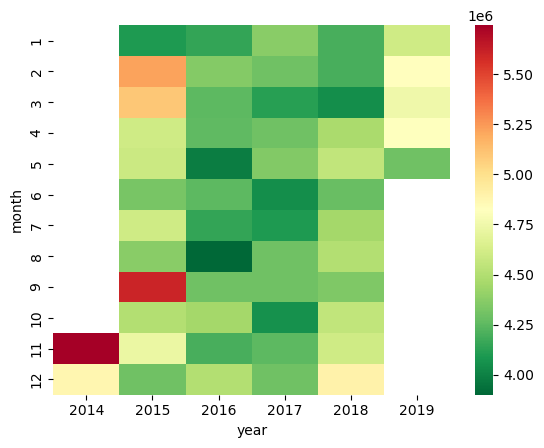

In [82]:
sns.heatmap(data.pivot_table(index='month', columns='year', values='last_price', aggfunc='median'), cmap='RdYlGn_r')

Among the settlements with the largest number of advertisements, the price per square meter is lower in Vsevolzhsk and Gatchina, the highest is in Pushkin and St. Petersburg.

In [83]:
data[
    data['locality_name']
    .isin(
        data['locality_name']
        .value_counts()[:10]
        .index
    )
].pivot_table(index='locality_name', values='sqm_cost').sort_values(by='sqm_cost')

,sqm_cost
locality_name,
Всеволожск,67215.551927
Гатчина,68419.703476
Колпино,75025.658527
поселок Шушары,78736.072015
Петергоф,82973.337500
поселок Мурино,85901.236272
поселок Парголово,90638.718911
деревня Кудрово,92855.022868
Пушкин,99961.573510


In [84]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,11819,5000000.0
поселок Мурино,446,3468500.0
поселок Шушары,387,3900000.0
Всеволожск,353,3400000.0
Колпино,315,3600000.0
Пушкин,295,4900000.0
поселок Парголово,288,4100000.0
Гатчина,283,3050000.0
деревня Кудрово,219,3790000.0


In St. Petersburg, proximity to the city center greatly influences the value of real estate. The average price in the city center is approximately 8,000,000, at a distance from 1 to 9 km - no less than 5,000,000, at a distance from 10 to 19 km - approximately 4,500,000. At a distance of 20 km it can drop to 2,500,000.

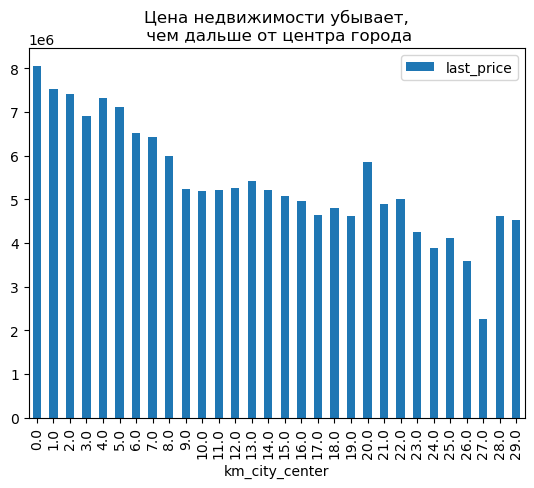

In [85]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_city_center', values='last_price')\
    .plot(kind='bar', title = 'Цена недвижимости убывает,\n чем дальше от центра города');

Gaps in data were replaced where possible with median values. Gaps in the data on the distance to the nearest pond, park, airport, city center were left. Other missing data were removed. The dataframe was cleared of outliers using boxplot and practical considerations. Thus, data on ceilings below 2.4 meters was removed because it does not meet the construction requirements for residential buildings.
The exploratory analysis led to the following conclusions. There is a strong linear relationship between total and living space. Kitchen area weakly correlates with total and living area. The most data is in the range from 30 to 50 sq.m., which correspond to prices from 3 to 5 million. Living area and kitchen area have a moderate impact on property value.

There is a trend towards increasing prices. From late 2014 to mid-2019, the median price per square meter rose from 90,000 to 100,000. The median price per square meter decreases depending on the number of rooms. Prices per sq.m. depend slightly on the number of floors in the house or the floor of the apartment itself. Apartments on the first and last floor are usually cheaper.

In cities with the greatest supply, the cheapest real estate is in Vsevolzhsk and Gatchina, the most expensive is in St. Petersburg. Half of the properties are sold within 3 months of an advertisement